### Import packages

In [294]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pandas_profiling import ProfileReport

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

#### Load data

In [295]:
#cases = pd.read_csv('../data/cases_v2.csv', encoding = "ISO-8859-1")
#deaths = pd.read_csv('../data/deaths_v2.csv', encoding = "ISO-8859-1")
cases = pd.read_csv('../data/time_series_covid19_confirmed_global.csv', skiprows=[1])
deaths = pd.read_csv('../data/time_series_covid19_deaths_global.csv', skiprows=[1])
recovered = pd.read_csv('../data/time_series_covid19_recovered_global.csv', skiprows=[1])
ages = pd.read_csv('../data/age_all.csv', encoding = "ISO-8859-1")
gdp = pd.read_csv('../data/gdp.csv')
lifeexpect = pd.read_csv('../data/lifeexpect.csv')
popdense = pd.read_csv('../data/popdense.csv')
lockdown = pd.read_csv('../data/countryLockdowndates.csv')
countries = pd.read_csv('../data/country-main.csv', encoding = "ISO-8859-1")
population = pd.read_csv('../data/population.csv')
population2 = pd.read_csv('../data/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv')

In [296]:
# Which regions in the JHU data have direct matches in countries?
#print(deaths.shape, deaths['Country/Region'].unique().shape)
#print(deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique().shape)

In [297]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  deaths.loc[deaths['Country/Region'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  cases.loc[cases['Country/Region'] == c, 'Territory'] = c

deaths.loc[deaths['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'

In [298]:
# The problem ones we need to reconcile manually:
#print(deaths.loc[~deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique())

In [299]:
# Add them manually:
deaths.loc[deaths['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
deaths.loc[deaths['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
deaths.loc[deaths['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
deaths.loc[deaths['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
deaths.loc[deaths['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
deaths.loc[deaths['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
deaths.loc[deaths['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
deaths.loc[deaths['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
deaths.loc[deaths['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
deaths.loc[deaths['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"
deaths.loc[deaths['Country/Region'] == 'Burma', 'Territory'] = "Myanmar"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['Country/Region'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
cases.loc[cases['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
cases.loc[cases['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
cases.loc[cases['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
cases.loc[cases['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
cases.loc[cases['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
cases.loc[cases['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
cases.loc[cases['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
cases.loc[cases['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
cases.loc[cases['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
cases.loc[cases['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
cases.loc[cases['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
cases.loc[cases['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"
cases.loc[cases['Country/Region'] == 'Burma', 'Territory'] = "Myanmar"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['Country/Region'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)

Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'MS Zaandam'
 'Western Sahara']
(263, 86)
(257, 86)
Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'MS Zaandam'
 'Western Sahara']
(263, 86)
(257, 86)


#### Add countries that currrently have no cases

In [300]:
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)

Adding: ['Afghanistan' 'Comoros (the)' 'Kiribati' 'Lesotho'
 'Marshall Islands (the)' 'Micronesia (Federated States of)' 'Nauru'
 'Palau' 'Republic of Korea (the)' 'Samoa' 'Solomon Islands' 'Sudan (the)'
 'Tajikistan' 'Tonga' 'Turkmenistan' 'Tuvalu' 'Vanuatu' 'Holy See (the) *'
 'State of Palestine (the) *' 'Cook Islands (the) **' 'Niue **' nan
 '*Observer State' '**Member of specialized agencies']
(281, 86)
(281, 86)


#### Replace Territory value with Province/Region for states that are governed by countries (this will ensure that the groupby doesn't include territories not physically part of a country)

In [301]:
for r in ['St Martin', 'Faroe Islands', 'Saint Barthelemy', 'French Polynesia', 'French Guiana', 'Mayotte',
          'Guadeloupe', 'Curacao', 'Cayman Islands', 'Reunion', 'Aruba', 'Montserrat', 'Greenland', 'New Caledonia', 'Bermuda',
          'Channel Islands', 'Gibraltar', 'Isle of Man', 'Anguilla', 'British Virgin Islands', 'Turks and Caicos Islands', 
          'Falkland Islands (Malvinas)', 'Sint Maarten', 'Bonaire, Sint Eustatius and Saba', 'Martinique', 'Grand Princess', 
          'Saint Pierre and Miquelon', 'French Guiana', 'Recovered']:
  if deaths.loc[deaths['Province/State']==r].shape[0]<1:
    print(r)
  deaths.loc[deaths['Province/State']==r, 'Territory'] = r
  cases.loc[cases['Province/State']==r, 'Territory'] = r

In [302]:
#cases['Territory'].value_counts()
#cases[cases['Territory'] == 'Australia']

#### Check and remove any countries that have no value for territory

In [303]:
cases = cases[~cases['Territory'].isna()]
deaths = deaths[~deaths['Territory'].isna()]

#### In order to merge the World Bank data, we need to allocate a country code to each territory which will serve as a primary key for merges

In [304]:
# Add a copy of the English short column as Territory to be used for the allocation of Country Code
countries['Territory'] = countries['English short']
cases = cases.merge(countries[['Territory','Country Code']], on = 'Territory', how = 'left')
deaths = deaths.merge(countries[['Territory','Country Code']], on = 'Territory', how = 'left')

In [305]:
cases[cases['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,Territory,Country Code
105,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,7,11,11,11,11,15,18,18,20,23,28,28,28,28,28,43,43,51,51,57,61,61,72,72,77,83,83,83,French Guiana,NaN
106,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,6,11,15,18,18,25,25,30,30,30,30,36,36,37,37,39,40,41,42,47,51,51,51,51,French Polynesia,NaN
107,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,6,18,27,33,45,53,58,62,62,73,73,73,102,106,106,114,125,128,130,134,135,135,139,141,141,143,143,Guadeloupe,NaN
108,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,6,7,11,24,36,36,36,50,63,63,82,94,94,116,128,134,147,147,171,171,184,191,196,Mayotte,NaN
109,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,4,8,10,14,14,15,15,15,15,16,16,18,18,17,18,18,18,18,18,18,18,New Caledonia,NaN
110,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,6,7,9,9,12,14,28,45,64,71,94,111,135,145,183,183,224,247,281,308,321,334,344,349,358,358,362,382,388,Reunion,NaN
111,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,Saint Barthelemy,NaN
112,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,3,4,4,4,5,8,8,11,11,11,11,11,15,15,15,22,22,24,32,32,32,32,32,32,32,St Martin,NaN
113,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,3,3,9,9,15,16,19,23,32,32,44,53,57,66,66,81,93,93,93,128,135,138,143,145,149,151,152,154,154,155,155,Martinique,NaN
114,NaN,France,46.2276,2.2137,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,2281,2281,3661,4469,4499,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,89953,92839,98010,109069,112950,117749,124869,129654,France,FRA


#### Drop Province/State and Country/Region columns. Rename Territory to Country and move to start of table

In [306]:
cases = cases.drop(['Province/State', 'Country/Region'], axis=1)
deaths = deaths.drop(['Province/State', 'Country/Region'], axis=1)

In [307]:
cases = cases.rename(columns={'Territory' : 'Country'})
deaths = deaths.rename(columns={'Territory' : 'Country'})

#### Move columns into logical order

In [308]:
cols = list(cases)
cols.insert(1, cols.pop(cols.index('Country')))
cols.insert(0, cols.pop(cols.index('Country Code')))
cases = cases.loc[:, cols]

cols = list(deaths)
cols.insert(1, cols.pop(cols.index('Country')))
cols.insert(0, cols.pop(cols.index('Country Code')))
deaths = deaths.loc[:, cols]

In [309]:
pd.set_option('display.max_columns', 500)
cases[cases['Country'] == 'France']

,Country Code,Lat,Country,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
114,FRA,46.2276,France,2.2137,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,2281,2281,3661,4469,4499,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,89953,92839,98010,109069,112950,117749,124869,129654


#### Check how many country codes are missing but don't drop rows with no country code as they may be used for geo-spatial visualisations

In [310]:
#cases[cases['Country Code'].isna()]

#### Merge World Bank Data 

In [311]:
cases = cases.merge(ages[['Country Code', '14.1', '15-64.1', '65.1']], on = 'Country Code', how='left')
deaths = deaths.merge(ages[['Country Code', '14.1', '15-64.1', '65.1']], on = 'Country Code', how='left')

cases = cases.merge(gdp[['Country Code', 'gdp']], on = 'Country Code', how='left')
deaths = deaths.merge(gdp[['Country Code', 'gdp']], on = 'Country Code', how='left')

cases = cases.merge(lifeexpect[['Country Code', 'life_expect']], on = 'Country Code', how='left')
deaths = deaths.merge(lifeexpect[['Country Code', 'life_expect']], on = 'Country Code', how='left')

cases = cases.merge(popdense[['Country Code', 'pop_dense']], on = 'Country Code', how='left')
deaths = deaths.merge(popdense[['Country Code', 'pop_dense']], on = 'Country Code', how='left')

cases = cases.merge(population[['Country Code', 'population']], on = 'Country Code', how='left')
deaths = deaths.merge(population[['Country Code', 'population']], on = 'Country Code', how='left')


In [312]:
cases.head()

,Country Code,Lat,Country,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,14.1,15-64.1,65.1,gdp,life_expect,pop_dense,population
0,ALB,41.1533,Albania,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,0.176729,0.685824,0.137447,13364.155400,78.333,104.612263,2866376.0
1,DZA,28.0339,Algeria,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,0.301487,0.634888,0.063625,15481.787620,76.499,17.730075,42228429.0
2,AND,42.5063,Andorra,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,0.000000,0.000000,0.000000,NaN,NaN,163.842553,77006.0
3,AGO,-11.2027,Angola,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,0.468089,0.509747,0.022164,6452.355165,60.379,24.713052,30809762.0
4,ATG,17.0608,Antigua and Barbuda,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,0.220811,0.691191,0.087998,26868.133520,76.752,218.831818,96286.0


#### Determine number of days since first case

In [313]:
d = cases.mask(cases == 0).drop(['Country Code', 'Country', 'Lat', 'Long', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population'], 1)
cases = cases.assign(first_case=d.apply(pd.Series.first_valid_index, 1))

d = deaths.mask(deaths == 0).drop(['Country Code', 'Country', 'Lat', 'Long', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population'], 1)
deaths = deaths.assign(first_death=d.apply(pd.Series.first_valid_index, 1))

#### Calculate number of days from beginning of records until latest

In [314]:
today = str(cases.iloc[:,[cases.columns.get_loc('14.1') - 1]].columns.tolist())
print(today)
today = today.replace('[', '')
today = today.replace(']', '')
today = today.replace("'", "")

start = str(cases.iloc[:,[cases.columns.get_loc('Long') + 1]].columns.tolist())
print(start)
start = start.replace('[', '')
start = start.replace(']', '')
start = start.replace("'", "")

latest_day = today
today = datetime.datetime.strptime(today, "%m/%d/%y").date()
start = datetime.datetime.strptime(start, "%m/%d/%y").date()
timedelta = (today - start).days

['4/11/20']
['1/22/20']


In [315]:
cases['first_case'] = pd.to_datetime(cases['first_case'], format="%m/%d/%y")
deaths['first_death'] = pd.to_datetime(deaths['first_death'], format="%m/%d/%y")
today = pd.to_datetime(today, format="%Y-%m-%d")
cases['days_since_first_case'] = (today - cases['first_case'])  / np.timedelta64(1, 'D')
deaths['days_since_first_death'] = (today - deaths['first_death'])  / np.timedelta64(1, 'D')

cases['first_case_day'] = timedelta - cases['days_since_first_case']
deaths['first_death_day'] = timedelta - deaths['days_since_first_death']

In [316]:
cases.head()

,Country Code,Lat,Country,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,14.1,15-64.1,65.1,gdp,life_expect,pop_dense,population,first_case,days_since_first_case,first_case_day
0,ALB,41.1533,Albania,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,0.176729,0.685824,0.137447,13364.155400,78.333,104.612263,2866376.0,2020-03-09,33.0,47.0
1,DZA,28.0339,Algeria,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,0.301487,0.634888,0.063625,15481.787620,76.499,17.730075,42228429.0,2020-02-25,46.0,34.0
2,AND,42.5063,Andorra,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,0.000000,0.000000,0.000000,NaN,NaN,163.842553,77006.0,2020-03-02,40.0,40.0
3,AGO,-11.2027,Angola,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,0.468089,0.509747,0.022164,6452.355165,60.379,24.713052,30809762.0,2020-03-20,22.0,58.0
4,ATG,17.0608,Antigua and Barbuda,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,0.220811,0.691191,0.087998,26868.133520,76.752,218.831818,96286.0,2020-03-13,29.0,51.0


#### For countries with multiple territories, use country coordinates

In [317]:
auslist = cases.index[cases['Country Code'] == 'AUS'].tolist()
canlist = cases.index[cases['Country Code'] == 'CAN'].tolist()
chnlist = cases.index[cases['Country Code'] == 'CHN'].tolist()
cases.loc[auslist, 'Lat'] = -25.734968
cases.loc[auslist, 'Long'] = 134.489563
cases.loc[canlist, 'Lat'] = 56.1303673
cases.loc[canlist, 'Long'] = -106.3467712
cases.loc[chnlist, 'Lat'] = 35.86166
cases.loc[chnlist, 'Long'] = 104.1953964
cases.loc[auslist, 'days_since_first_case'] = max(cases[cases['Country Code'] == 'AUS']['days_since_first_case'])
cases.loc[canlist, 'days_since_first_case'] = max(cases[cases['Country Code'] == 'CAN']['days_since_first_case'])
cases.loc[chnlist, 'days_since_first_case'] = max(cases[cases['Country Code'] == 'CHN']['days_since_first_case'])
cases.loc[auslist, 'first_case_day'] = max(cases[cases['Country Code'] == 'AUS']['first_case_day'])
cases.loc[canlist, 'first_case_day'] = max(cases[cases['Country Code'] == 'CAN']['first_case_day'])
cases.loc[chnlist, 'first_case_day'] = max(cases[cases['Country Code'] == 'CHN']['first_case_day'])

chnlist = deaths.index[deaths['Country Code'] == 'CHN'].tolist()
auslist = deaths.index[deaths['Country Code'] == 'AUS'].tolist()
canlist = deaths.index[deaths['Country Code'] == 'CAN'].tolist()
deaths.loc[auslist, 'Lat'] = -25.734968
deaths.loc[auslist, 'Long'] = 134.489563
deaths.loc[canlist, 'Lat'] = 56.1303673
deaths.loc[canlist, 'Long'] = -106.3467712
deaths.loc[chnlist, 'Lat'] = 35.86166
deaths.loc[chnlist, 'Long'] = 104.1953964
deaths.loc[auslist, 'days_since_first_death'] = max(deaths[deaths['Country Code'] == 'AUS']['days_since_first_death'])
deaths.loc[canlist, 'days_since_first_death'] = max(deaths[deaths['Country Code'] == 'CAN']['days_since_first_death'])
deaths.loc[chnlist, 'days_since_first_death'] = max(deaths[deaths['Country Code'] == 'CHN']['days_since_first_death'])
deaths.loc[auslist, 'first_death_day'] = max(deaths[deaths['Country Code'] == 'AUS']['first_death_day'])
deaths.loc[canlist, 'first_death_day'] = max(deaths[deaths['Country Code'] == 'CAN']['first_death_day'])
deaths.loc[chnlist, 'first_death_day'] = max(deaths[deaths['Country Code'] == 'CHN']['first_death_day'])

#### Create prediction dataframe to be used for predictions (remove rows with missing data)

In [318]:
case_pred_df = cases
deaths_pred_df = deaths

In [319]:
for col in case_pred_df.columns:
    case_pred_df = case_pred_df[~case_pred_df[col].isna()]
    
for col_d in deaths_pred_df.columns:
    deaths_pred_df = deaths_pred_df[~deaths_pred_df[col_d].isna()]

# Check if there are any NaN values    
#case_pred_df.isna().sum().sum()

In [320]:
sum_cols = case_pred_df.columns.tolist()[4:(cases.columns.get_loc('14.1'))]
case_pred_df = case_pred_df.groupby(['Country', 'Country Code', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population', 'days_since_first_case', 'first_case_day'])[sum_cols].sum().reset_index()

sum_cols = deaths_pred_df.columns.tolist()[4:(deaths.columns.get_loc('14.1'))]
deaths_pred_df = deaths_pred_df.groupby(['Country', 'Country Code', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population', 'days_since_first_death', 'first_death_day'])[sum_cols].sum().reset_index()

#### Sort countries in descending order by case count

In [321]:
case_pred_df = case_pred_df.append(case_pred_df.sum(numeric_only=True), ignore_index=True)

In [322]:
#case_pred_df.loc[167][0] = 1
case_pred_df['Country'][167] = 'Global'

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [323]:
case_pred_df.sort_values(by=[latest_day], ascending=False, inplace=True)
deaths_pred_df.sort_values(by=[latest_day], ascending=False, inplace=True)
case_pred_df.reset_index(drop=True, inplace=True)
deaths_pred_df.reset_index(drop=True, inplace=True)

#### Select top 20 and SA

In [324]:
SA_cases_index = case_pred_df.loc[case_pred_df['Country Code'] == 'ZAF'].index
#case_pred_20 = case_pred_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,SA_cases_index[0]],:]
case_pred_20 = case_pred_df.iloc[[0,1,3,4,5,7],:]
case_pred_20.reset_index(drop=True, inplace=True)

top20 = case_pred_20['Country Code'].to_list()
deaths_pred_20 = deaths_pred_df[deaths_pred_df['Country Code'].isin(top20)]
deaths_pred_20.reset_index(drop=True, inplace=True)

# SA_deaths_index = deaths_pred_df.loc[case_pred_df['Country Code'] == 'ZAF'].index
# case_pred_20 = case_pred_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,SA_cases_index[0]],:]
# case_pred_20.reset_index(drop=True, inplace=True)

#### Normalise large values

In [325]:
#case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']] =(case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']]-case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].min())/(case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].max()-case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].min())
#deaths_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']] =(deaths_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']]-deaths_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].min())/(deaths_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].max()-case_pred_df[['gdp', 'life_expect', 'pop_dense', 'population']].min())

#### Convert column names to days from start

In [326]:
column_new = list(range(1,timedelta))
i=0
for col in case_pred_20[sum_cols]:
    case_pred_20 = case_pred_20.rename(columns={col: i})
    deaths_pred_20 = deaths_pred_20.rename(columns={col: i})
    i=i+1

#### Normalise by population for model fitting

In [327]:
sum_cols = case_pred_20.columns.tolist()[11::]

case_pred_20[sum_cols] = case_pred_20[sum_cols].div(case_pred_20['population'], axis = 0) * 1000
deaths_pred_20[sum_cols] = deaths_pred_20[sum_cols].div(deaths_pred_20['population'], axis = 0) * 1000

#### For model fitting, we don't need the World Bank data, therefore, remove

In [328]:
case_pred_20 = case_pred_20.drop(['Country Code', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population', 'days_since_first_case', 'first_case_day'], axis=1)
deaths_pred_20 = deaths_pred_20.drop(['Country Code', '14.1', '15-64.1', '65.1', 'gdp', 'life_expect', 'pop_dense', 'population', 'days_since_first_death', 'first_death_day'], axis=1)

In [329]:
case_pred_20_trans = case_pred_20.transpose()
case_pred_20_trans.columns = case_pred_20_trans.iloc[0]
case_pred_20_trans = case_pred_20_trans.drop(['Country'])

deaths_pred_20_trans = deaths_pred_20.transpose()
deaths_pred_20_trans.columns = deaths_pred_20_trans.iloc[0]
deaths_pred_20_trans = deaths_pred_20_trans.drop(['Country'])

In [330]:
case_pred_20_trans['day'] = case_pred_20_trans.index
deaths_pred_20_trans['day'] = deaths_pred_20_trans.index

In [331]:
cols = list(case_pred_20_trans)
cols.insert(0, cols.pop(cols.index('day')))
case_pred_20_trans = case_pred_20_trans.loc[:, cols]
case_pred_20_trans.columns.name=''

cols = list(deaths_pred_20_trans)
cols.insert(0, cols.pop(cols.index('day')))
deaths_pred_20_trans = deaths_pred_20_trans.loc[:, cols]
deaths_pred_20_trans.columns.name=''

In [332]:
case_pred_20_trans.to_csv('case_pred_20_trans.csv')

In [333]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [334]:
def logistic_pop(x,p_0,r,K):
    return (p_0*K)/(p_0 + np.dot((K-p_0),np.exp(np.dot(x, -r))))

In [335]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [336]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [368]:
coef = []
sol_list = []
max_pred = 110
preds_cases = pd.DataFrame(columns=['day', 'France', 'Germany', 'Italy', 'United Kingdom of Great Britain and Northern Ireland (the)', 'United States of America (the)', 'Global'])

for col in ['United Kingdom of Great Britain and Northern Ireland (the)']:
    
    if col == 'day': continue

    pred_vals = []
    pred_valsexp = []

    cases_pred = case_pred_20_trans[['day', col]]
    cases_pred = cases_pred.iloc[cases_pred[col].ne(0).idxmax()::].reset_index(drop=True)
    day_of_first = cases_pred['day'][0]
    cases_pred.reset_index(inplace=True)
    cases_pred['day'] = cases_pred['index']
    cases_pred = cases_pred.drop(['index'], axis=1)

    x = list(cases_pred.iloc[:,0])
    y = list(cases_pred.iloc[:,1])
    p_0 = cases_pred.loc[0][1]
    r, K =  5, 1000
    p0 = np.array([p_0, r, K])

    try:
        fit = curve_fit(logistic_pop,x,y,p0)
    except:
        fit = curve_fit(logistic_pop,x,y,p0, bounds = ([p_0-0.000000001,0.,0.], [p_0,1000.,1000000.]))
    if fit[0][2]*2 < float(cases_pred[col][-1::]): 
        fit = curve_fit(logistic_pop,x,y,p0, bounds = ([p_0-0.000000001,0.,0.], [p_0,1000.,1000000.]))
#    exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])
    popt, pcov = fit
    p_0,r,K = popt

    coef.append([p_0,r,K])

    sol = int(fsolve(lambda x : logistic_pop(x,p_0,r,K) - K,r))
    sol_list.append(sol)

    pred_x = list(range(max(x),max_pred))
    for i in x+pred_x:
        pred_vals.append(logistic_pop(i,fit[0][0],fit[0][1],fit[0][2]))
        pred_valsexp.append(exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]))
        
    preds_cases[col] = pred_vals
    
preds_cases = preds_cases[max(case_pred_20_trans['day'])+1::]    
case_pred_20_trans_preds = case_pred_20_trans.append(pd.DataFrame(preds_cases))
case_pred_20_trans_preds['day'] = case_pred_20_trans_preds.index.to_list()
cols = list(case_pred_20_trans_preds)
cols.insert(0, cols.pop(cols.index('day')))
case_pred_20_trans_preds = case_pred_20_trans_preds.loc[:, cols]
case_pred_20_trans_preds.columns.name=''

In [372]:
y_pred_logistic = [logistic_pop(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
abs_error = pd.DataFrame(np.subtract(y_pred_logistic, y))
rel_err = pd.DataFrame(np.subtract(y_pred_logistic, y) / y)

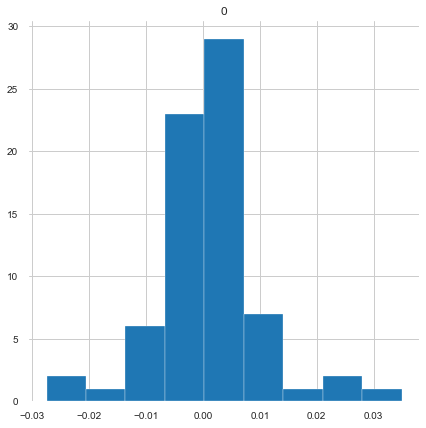

In [380]:
abs_error.hist(bins=9)
plt.savefig("../visualisations/hist1.png") 

In [388]:
from statistics import mean 
print("MSE = ", mean_squared_error(y,y_pred_logistic))
print("RMSE = ", np.sqrt(mean_squared_error(y,y_pred_logistic)))
mean(y)

MSE =  8.221572158870005e-05
RMSE =  0.009067288546677007


0.15462772877192055

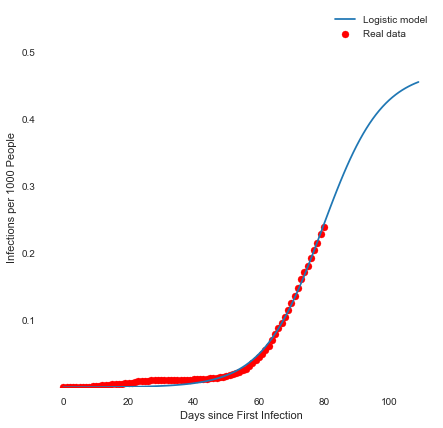

In [172]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, pred_vals, label="Logistic model" )
# Predicted exponential curve
#plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since First Infection")
plt.ylabel("Infections per 1000 People")
plt.ylim((min(y)*0.9,K*1.2))
plt.savefig('../visualisations/Global.png', dpi=100)
plt.show()


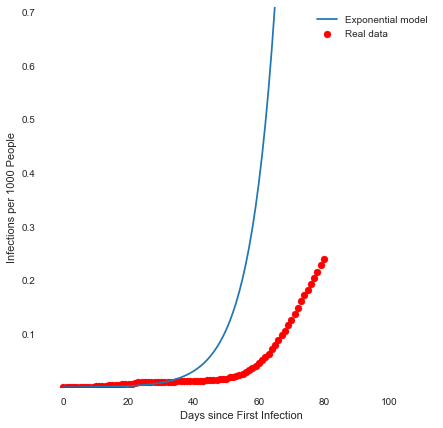

In [173]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, pred_valsexp, label="Exponential model" )
# Predicted exponential curve
#plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since First Infection")
plt.ylabel("Infections per 1000 People")
plt.ylim((min(y)*0.9,K*1.5))
plt.savefig('../visualisations/expGlobal.png', dpi=100)
plt.show()

In [ ]:
case_pred_20_trans_preds_date = case_pred_20_trans_preds
case_pred_20_trans_preds_date['date'] = case_pred_20_trans_preds_date['day']
#pd.to_timedelta(case_pred_20_trans_preds['day'], unit='D')
for i in range(len(case_pred_20_trans_preds_date['day'])):
#    print(pd.to_timedelta(case_pred_20_trans_preds['day'][i], unit='D'))
    case_pred_20_trans_preds['date'][i] = pd.to_timedelta(case_pred_20_trans_preds['day'][i], unit='D') + start

In [ ]:
case_pred_20_trans_preds

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter(x=case_pred_20_trans_preds['date'], y=case_pred_20_trans_preds['France'])
fig.show()

In [ ]:
trace1 = {
  "uid": "af1c8c", 
  "name": "USA", 
  "type": "scatter", 
  "x": case_pred_20_trans_preds['date'], 
  "y": case_pred_20_trans_preds['United States of America (the)']
}
trace2 = {
  "uid": "3b3365", 
  "name": "UK", 
  "type": "scatter", 
  "x": case_pred_20_trans_preds['date'], 
  "y": case_pred_20_trans_preds['United Kingdom of Great Britain and Northern Ireland (the)']
}
trace3 = {
  "uid": "684c3a", 
  "name": "Italy", 
  "type": "scatter", 
  "x": case_pred_20_trans_preds['date'], 
  "y": case_pred_20_trans_preds['Italy']
}
trace4 = {
  "uid": "901a27", 
  "name": "France", 
  "type": "scatter", 
  "x": case_pred_20_trans_preds['date'], 
  "y": case_pred_20_trans_preds['France']
}
trace5 = {
  "uid": "901a27", 
  "name": "Germany", 
  "type": "scatter", 
  "x": case_pred_20_trans_preds['date'], 
  "y": case_pred_20_trans_preds['Germany']
}

data = Data([trace1, trace2, trace3, trace4, trace5])
layout = {
  "title": "Confirmed Covid-19 Cases Over Time", 
  "width": 1099, 
  "xaxis": {
#    "type": "linear", 
#    "range": [0, 9.365127813811522], 
    "title": "Date", 
    "autorange": True
  }, 
  "yaxis": {
    "type": "linear", 
    "range": [0, 3.5], 
    "title": "Confirmed Cases per 1000 People", 
    "autorange": False
  }, 
  "height": 600, 
  "autosize": True
}

fig = Figure(data=data, layout=layout)
fig.show()

In [ ]:
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_y=[25,90])

In [ ]:
plot_df_temp = pd.DataFrame(columns=['day', 'date', 'country', 'cases'])
plot_df = pd.DataFrame(columns=['day', 'date', 'country', 'cases'])

for col in ['United States of America (the)','Italy', 'France', 'Germany', 'United Kingdom of Great Britain and Northern Ireland (the)']:

    plot_df_temp['cases'] = case_pred_20_trans_preds[col]
    plot_df_temp['day'] = case_pred_20_trans_preds['day']
    if col == 'United States of America (the)': plot_df_temp['country'] = 'USA'
    elif col == 'United Kingdom of Great Britain and Northern Ireland (the)': plot_df_temp['country'] = 'UK'
    else:
        plot_df_temp['country'] = col
    plot_df_temp['date'] = case_pred_20_trans_preds['date']
    
    plot_df = plot_df.append(plot_df_temp)
#    case_pred_20_trans_preds = case_pred_20_trans.append(pd.DataFrame(preds_cases))
    

In [ ]:
plot_df['date'] = plot_df['date'].astype(str)

In [ ]:
import plotly.graph_objects as go  #plotly 4.0.0rc1


df = case_pred_20_trans_preds
US = df['United States of America (the)'].tolist()
Germany = df['Germany'].tolist()
Italy = df['Italy'].tolist()
France = df['France'].tolist()
UK = df['United Kingdom of Great Britain and Northern Ireland (the)'].tolist()
Global = df['Global'].tolist()



trace1 = go.Scatter(x=df.date[:2],
                    y=US[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                    name="USA",
                   line_shape='spline')

trace2 = go.Scatter(x = df.date[:2],
                    y = Germany[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                    name="Germany",
                   line_shape='spline')

trace3 = go.Scatter(x = df.date[:2],
                    y = Italy[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                    name="Italy",
                   line_shape='spline')

trace4 = go.Scatter(x = df.date[:2],
                    y = France[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                    name="France",
                   line_shape='spline')

trace5 = go.Scatter(x = df.date[:2],
                    y = UK[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                     name="UK",
                   line_shape='spline')

trace6 = go.Scatter(x = df.date[:2],
                    y = Global[:2],
                    mode='lines+markers',
                    line=dict(width=1.5),
                     name="Global",
                   line_shape='spline')

frames = [dict(data= [dict(type='scatter',
                           x=df.date[:k+1],
                           y=US[:k+1]),
                      dict(type='scatter',
                           x=df.date[:k+1],
                           y=Germany[:k+1]),
                     dict(type='scatter',
                           x=df.date[:k+1],
                           y=Italy[:k+1]),
                     dict(type='scatter',
                           x=df.date[:k+1],
                           y=France[:k+1]),
                     dict(type='scatter',
                           x=df.date[:k+1],
                           y=UK[:k+1]),
                     dict(type='scatter',
                           x=df.date[:k+1],
                           y=Global[:k+1])],
               traces= [0, 1, 2, 3, 4, 5],  #this means that  frames[k]['data'][0]  updates trace1, and   frames[k]['data'][1], trace2 
              )for k  in  range(1, len(US)-1)] 

layout = go.Layout(width=1200,
                   height=800,
                   showlegend=True,
                   hovermode='closest',
                   
                   updatemenus=[dict(type='buttons', showactive=False,
                                y=1.05,
                                x=1.15,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None, 
                                                    dict(frame=dict(duration=35, 
                                                                    redraw=False),
                                                         transition=dict(duration=1000),
                                                         fromcurrent=True,
                                                         mode='immediate')])])])


layout.update(xaxis =dict(range=[df.date[0], df.date[len(df)-1]], autorange=False, rangeslider=dict(visible=True)),
              yaxis =dict(range=[-0.5, 3.5], autorange=False));
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6], frames=frames, layout=layout)
fig.update_layout(legend_title='<b> Country </b>', xaxis_title = 'Date', yaxis_title = 'Cases Per 1000 People', title = 'Covid-19 Cases Per 1000 People: History and Forecast (Today = 2020-04-12)')
fig.show()
fig.write_html("finalvisualisation.html")